In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
dataset = pd.read_csv('D:\Aakash Yadav\Documents\.NCU\ML\Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values


In [3]:
X


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [4]:
kmeans = KMeans(n_clusters = 2)

In [5]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [6]:
from sklearn.metrics import silhouette_score

In [7]:
sil = [0, 0]
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))

In [8]:
sil


[0,
 0,
 0.28622678604047447,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.53976103063432,
 0.5270287298101395,
 0.45827056882053113,
 0.45819645551960536,
 0.45838473235684846]

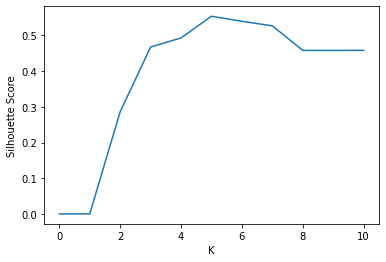

In [9]:
plt.plot(sil)
plt.ylabel('Silhouette Score')
plt.xlabel('K')
plt.show()

In [10]:
def getBestCluster(X,_min=2,_max=10):
    selected_cluster = 0
    previous_sil_coeff = 0.001 #some random small number not 0
    sc_vals = []
    for n_cluster in range(_min, _max):
        kmeans = KMeans(n_clusters=n_cluster).fit(X)
        label = kmeans.labels_

        sil_coeff = silhouette_score(X, label, metric='euclidean', sample_size=1000)
        sc_vals.append(sil_coeff)
        print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

        percent_change = (sil_coeff-previous_sil_coeff)*100/previous_sil_coeff

        # return when below a threshold of 1%
        if percent_change<1:
            selected_cluster = n_cluster-1

        previous_sil_coeff = sil_coeff

    return selected_cluster or _max, sc_vals

In [11]:
getBestCluster(X)

For n_clusters=2, The Silhouette Coefficient is 0.2918426367691145
For n_clusters=3, The Silhouette Coefficient is 0.4676135815877543
For n_clusters=4, The Silhouette Coefficient is 0.4931963109249047
For n_clusters=5, The Silhouette Coefficient is 0.553931997444648
For n_clusters=6, The Silhouette Coefficient is 0.5397610306343199
For n_clusters=7, The Silhouette Coefficient is 0.5314247434775297
For n_clusters=8, The Silhouette Coefficient is 0.45544193969058644
For n_clusters=9, The Silhouette Coefficient is 0.45841513839373804


(8,
 [0.2918426367691145,
  0.4676135815877543,
  0.4931963109249047,
  0.553931997444648,
  0.5397610306343199,
  0.5314247434775297,
  0.45544193969058644,
  0.45841513839373804])